# Projekt - 12.01.2024
Ważne, aby dane mogły być wczytywane w jasny sposób.
Możemy oddać przetrenowany model z wagami albo taki, że prowadzący u siebie je przetrenuje.
### Wyjście programu
- test modelu na danych od prowadzącego,
- confusion matrix,
- statystyki skuteczności-accuracy, precision, recall (czułość i pozytywne przewidywanie),
- miara F1.

Można to zrobić jedną metodą.
Przepatrzeć dane pod kątem odstawania od dziedziny.
W scikit można znaleźć metodę do obliczania metryk. Jest też confiussion matrix.

Tabela podziału grup.

##  Notes
### One Hot Encoding
Jak mamy dane nienumeryczne, np. nazwy ulic to możemy zamienić je na numeryczne za pomocą one-hot-encoding. W przypadku ulic wyglądać to będzie tak, że musimy mieć zbiór wszystkich unikatowych nazw ulic, a następnie wstawić je do kolumn i gdzie dana ulica występuje wstawić 1, a gdzie nie występuje wstawić 0. Dodatkowo można dać kolumnę z nieznaną ulicą na wypadek dodawania nowych ulic.

## Termin oddania do 26.01.2024. Wysyłać mailem kto pierwszy ten lepszy.

In [873]:
import pandas as pd
df = pd.read_csv('Cardiovascular_Disease_Dataset_mod.csv', sep=';')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,103368,53,1,2,171,0,0,1,147,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,119250,40,1,0,94,229,0,1,115,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,119372,49,1,2,133,142,0,0,202,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132514,43,1,0,138,295,1,1,153,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146211,31,1,1,199,0,0,1,136,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Oczyszczanie danych

In [874]:
df = df.dropna(axis=1)
print(f'Ilosc kolumn po usunięciu NaN: {len(df.columns)}')

Ilosc kolumn po usunięciu NaN: 13


Cast str to float with comma replacement

In [875]:
df['oldpeak'] = df['oldpeak'].apply(lambda row: float(row.replace(',', '.')))

Sprawdzenie czy dane zgadzają się z dziedziną
serumcholestrol odstaje od dziedziny zdefiniowanej w pdf'ie.

In [876]:
# df[df['serumcholestrol'] < 126]
# df[564 < df['serumcholestrol']]
# df.drop(df[df['serumcholestrol'] < 126].index, inplace=True)
# df.drop(df[564 < df['serumcholestrol']].index, inplace=True)


Macierz korelacji

In [877]:
df.drop(columns=['patientid'], inplace=True)
features_to_train = ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'oldpeak', 'noofmajorvessels']
df.corr()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,noofmajorvessels,target
age,1.000000,-0.023209,0.054891,-0.003373,0.047303,0.054748,0.062308,-0.035844,-0.044910,-0.007279,0.022472,0.030817
gender,-0.023209,1.000000,0.016881,-0.062147,-0.135734,0.021365,-0.056341,0.053861,-0.042214,0.337706,0.025089,0.009890
chestpain,0.054891,0.016881,1.000000,0.224417,0.190609,0.227417,0.225964,0.102276,-0.040164,0.098067,0.298675,0.569015
restingBP,-0.003373,-0.062147,0.224417,1.000000,0.143339,0.188137,0.205286,0.098379,-0.042093,-0.003380,0.260906,0.473796
serumcholestrol,0.047303,-0.135734,0.190609,0.143339,1.000000,0.282961,0.092088,0.053164,0.021296,-0.029978,0.127908,0.203410
fastingbloodsugar,0.054748,0.021365,0.227417,0.188137,0.282961,1.000000,0.142115,0.097786,0.024514,0.024076,0.180371,0.306366
restingrelectro,0.062308,-0.056341,0.225964,0.205286,0.092088,0.142115,1.000000,0.074442,-0.012888,0.038225,0.156493,0.351264
maxheartrate,-0.035844,0.053861,0.102276,0.098379,0.053164,0.097786,0.074442,1.000000,0.019709,0.054576,0.110596,0.223924
exerciseangia,-0.044910,-0.042214,-0.040164,-0.042093,0.021296,0.024514,-0.012888,0.019709,1.000000,-0.014210,-0.010447,-0.019609
oldpeak,-0.007279,0.337706,0.098067,-0.003380,-0.029978,0.024076,0.038225,0.054576,-0.014210,1.000000,0.094229,0.103313


Training

In [878]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


X = df[features_to_train]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(learning_rate=0.5, max_depth=4, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Test - hyperparameters tuning for SVC
Dobieranie hyperparameters dla SVC trwa mega długo. Fajnie by znaleźć optymalne parametry dla GradientBootedTree.

In [879]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.svm import SVC

params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
# define the search
search = GridSearchCV(estimator=SVC(), param_grid=params, n_jobs=-1, cv=cv)
# perform the search
# search.fit(X, y) - takes muliple hours to end c:
# report the best result
# print(search.best_score_)
# print(search.best_params_)

Ocenianie modelu

Model report
               precision    recall  f1-score   support

           0      0.987     0.962     0.974        78
           1      0.971     0.990     0.981       102

    accuracy                          0.978       180
   macro avg      0.979     0.976     0.977       180
weighted avg      0.978     0.978     0.978       180



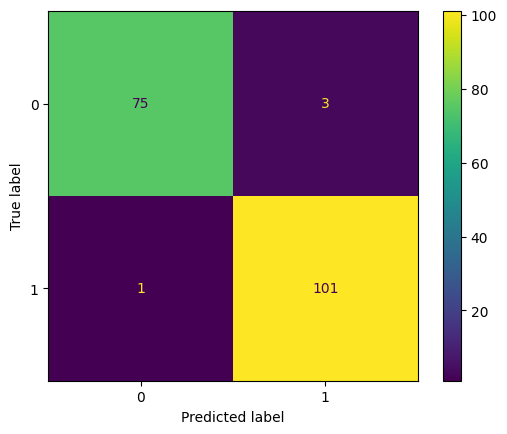

In [880]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=3)

cm = confusion_matrix(y_test, y_pred)
dispCM = ConfusionMatrixDisplay(confusion_matrix=cm)

print('Model report\n', report)
dispCM.plot()

Walidacja krzyżowa - pozwala ocenić czy model ma tendencję do generalizacji

In [881]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Mean accuracy:", cv_scores.mean())
print("Cross-Validation Scores:", cv_scores)

Mean accuracy: 0.961030415890751
Cross-Validation Scores: [0.95555556 0.96666667 0.95555556 0.96648045 0.96089385]
